<a href="https://colab.research.google.com/github/diegocoimbra07/Projeto_Desenvolvimento_de_Sistema_para_WEB_TDS3/blob/main/Projeto_Desenvolvimento_de_Sistema_para_WEB_TDS3_Diego_Oliveira_Coimbra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando os Dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o arquivo CSV (apenas uma vez!)
df = pd.read_csv('/content/drive/MyDrive/crimes_ciberneticos.CSV', sep=';', encoding='ISO-8859-1')

# Exibir o DataFrame
display(df.head())

,UF,ANO,MÊS,ÁREA DE ATRIBUIÇÃO,QTD DE OPERAÇÕES,FLAGRANTES,QTD DE VÍTIMAS DE ABUSO SEXUAL INFANTOJUVENIL RESGATADAS,MBAs
0,AC,2024,jan,Crimes cibernéticos relacionados ao abuso sexu...,2,0,0,2
1,AC,2024,fev,Crimes de alta tecnologia,1,0,0,1
2,AC,2024,mar,Crimes cibernéticos relacionados ao abuso sexu...,5,2,0,5
3,AC,2024,abr,Crimes cibernéticos relacionados ao abuso sexu...,2,1,0,2
4,AC,2024,mai,Crimes cibernéticos relacionados ao abuso sexu...,1,2,0,1


In [16]:
# Verificar colunas disponíveis
display(df.columns)

Index(['UF', 'ANO', 'MÊS', 'ÁREA DE ATRIBUIÇÃO', 'QTD DE OPERAÇÕES',
       'FLAGRANTES',
       'QTD DE VÍTIMAS DE ABUSO SEXUAL INFANTOJUVENIL RESGATADAS', 'MBAs'],
      dtype='object')

1. Análise por Estado (DF e SP destacados)

<ipython-input-5-a39fcef4309f>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=crimes_por_estado, x='UF', y='QTD DE OPERAÇÕES', palette=cores)


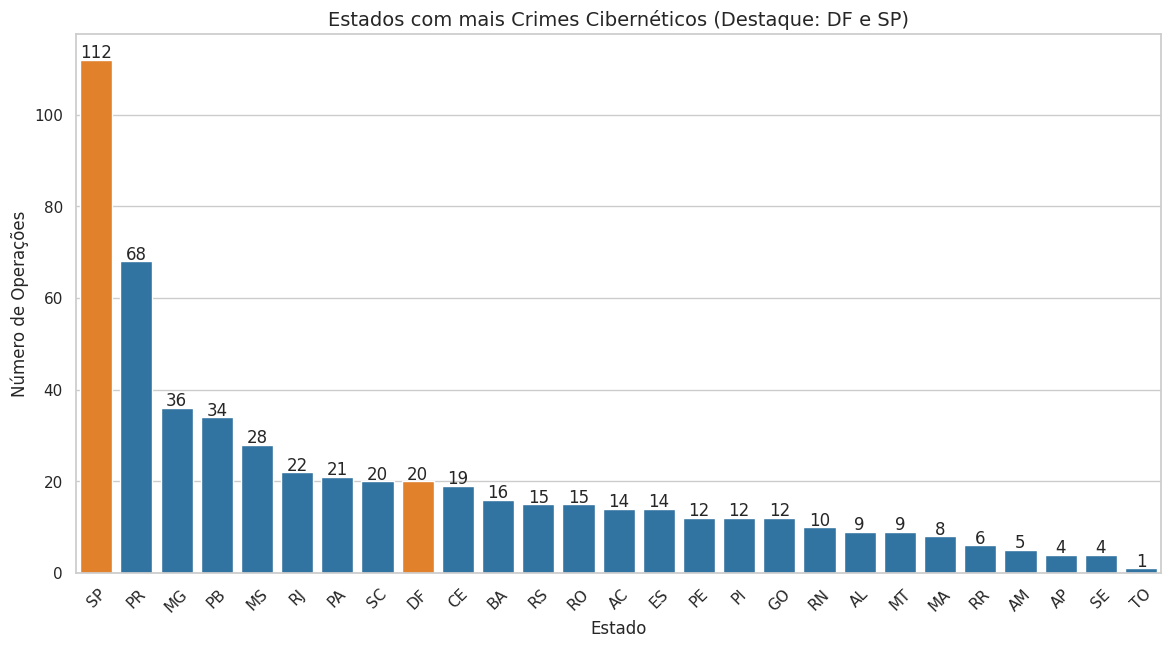

In [ ]:
# Calcular operações por estado
crimes_por_estado = df.groupby('UF')['QTD DE OPERAÇÕES'].sum().reset_index()
crimes_por_estado = crimes_por_estado.sort_values(by='QTD DE OPERAÇÕES', ascending=False)

# Gráfico de barras
plt.figure(figsize=(14, 7))
sns.set_theme(style="whitegrid")
cores = ["#1f77b4" if estado not in ['DF', 'SP'] else "#ff7f0e" for estado in crimes_por_estado['UF']]
ax = sns.barplot(data=crimes_por_estado, x='UF', y='QTD DE OPERAÇÕES', palette=cores)

plt.title('Estados com mais Crimes Cibernéticos (Destaque: DF e SP)', fontsize=14)
plt.xlabel('Estado', fontsize=12)
plt.ylabel('Número de Operações', fontsize=12)
plt.xticks(rotation=45)

# Adicionar valores nas barras
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='center',
        xytext=(0, 5),
        textcoords='offset points'
    )
plt.show()

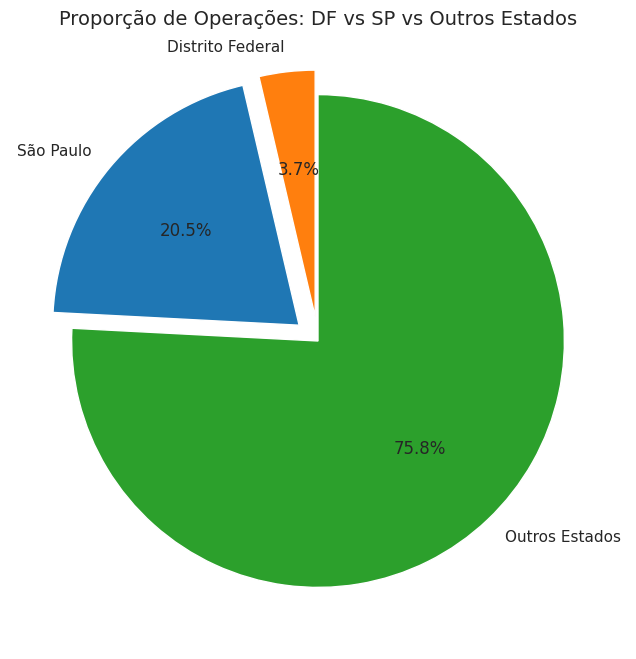

In [ ]:
# Gráfico de pizza (DF vs SP vs outros)
total_df = crimes_por_estado[crimes_por_estado['UF'] == 'DF']['QTD DE OPERAÇÕES'].values[0]
total_sp = crimes_por_estado[crimes_por_estado['UF'] == 'SP']['QTD DE OPERAÇÕES'].values[0]
total_outros = crimes_por_estado[~crimes_por_estado['UF'].isin(['DF', 'SP'])]['QTD DE OPERAÇÕES'].sum()

dados_pizza = pd.DataFrame({
    'Categoria': ['Distrito Federal', 'São Paulo', 'Outros Estados'],
    'QTD DE OPERAÇÕES': [total_df, total_sp, total_outros]
})

plt.figure(figsize=(8, 8))
plt.pie(dados_pizza['QTD DE OPERAÇÕES'], labels=dados_pizza['Categoria'], autopct='%1.1f%%',
        startangle=90, colors=['#ff7f0e', '#1f77b4', '#2ca02c'], explode=(0.1, 0.1, 0))
plt.title('Proporção de Operações: DF vs SP vs Outros Estados', fontsize=14)
plt.show()

 2. Análise Temporal (Correções e Melhorias)

In [ ]:
# Verificar valores únicos de ANO e MÊS
print("Anos disponíveis:", df['ANO'].unique())
print("Meses disponíveis:", df['MÊS'].unique())

# Verificar tipo de dados das colunas
print("\nTipos de dados:")
print("ANO:", df['ANO'].dtype)
print("MÊS:", df['MÊS'].dtype)
print("QTD DE OPERAÇÕES:", df['QTD DE OPERAÇÕES'].dtype)

Anos disponíveis: [2024]
Meses disponíveis: ['jan' 'fev' 'mar' 'abr' 'mai' 'jun' 'jul' 'ago']

Tipos de dados:
ANO: int64
MÊS: object
QTD DE OPERAÇÕES: int64


DF

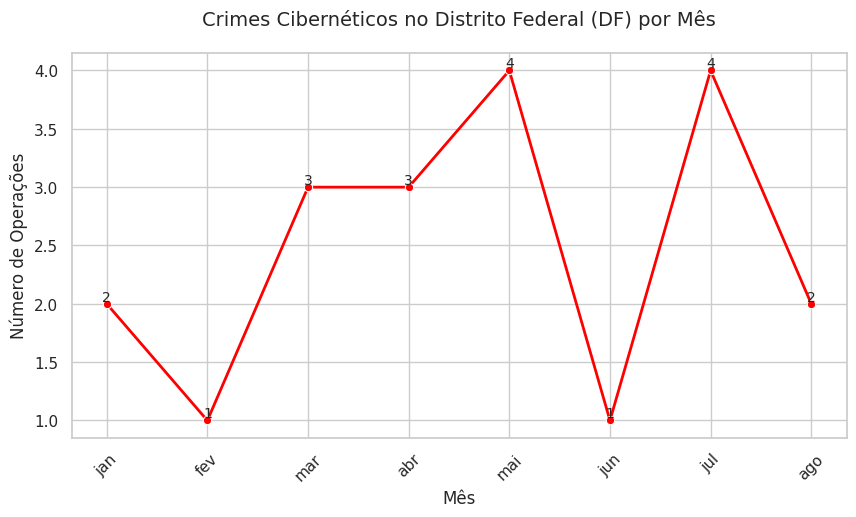

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o arquivo CSV
df = pd.read_csv('/content/drive/MyDrive/crimes_ciberneticos.CSV', sep=';', encoding='ISO-8859-1')

# Filtrar apenas o DF
df_df = df[df['UF'] == 'DF']

# Agrupar por mês (ou outra métrica relevante)
crimes_df = df_df.groupby('MÊS')['QTD DE OPERAÇÕES'].sum().reset_index()

# Ordenar os meses na ordem correta (caso os dados estejam desorganizados)
meses_ordenados = ['jan', 'fev', 'mar', 'abr', 'mai', 'jun', 'jul', 'ago', 'set', 'out', 'nov', 'dez']
crimes_df['MÊS'] = pd.Categorical(crimes_df['MÊS'], categories=meses_ordenados, ordered=True)
crimes_df = crimes_df.sort_values(by='MÊS')

# Configurar o gráfico
plt.figure(figsize=(10, 5))
sns.set_theme(style="whitegrid")

# Criar gráfico de linha para melhor visualização da tendência
sns.lineplot(data=crimes_df, x='MÊS', y='QTD DE OPERAÇÕES', marker='o', color='red', linewidth=2)

# Personalizar
plt.title('Crimes Cibernéticos no Distrito Federal (DF) por Mês', fontsize=14, pad=20)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Número de Operações', fontsize=12)
plt.xticks(rotation=45)

# Adicionar valores nos pontos
for i, row in crimes_df.iterrows():
    plt.text(row['MÊS'], row['QTD DE OPERAÇÕES'], str(row['QTD DE OPERAÇÕES']), ha='center', va='bottom', fontsize=10)

plt.show()

Informações solicitadas pelo usuário


🔹 Escolha uma opção de filtro:
1 - Filtrar por Estado (UF)
2 - Filtrar por Mês
Digite a opção desejada (1 ou 2): 1
Digite a sigla do Estado (UF) que deseja filtrar: df


,MÊS,QTD DE OPERAÇÕES
3,jan,2
2,fev,1
7,mar,3
0,abr,3
6,mai,4
5,jun,1
4,jul,4
1,ago,2


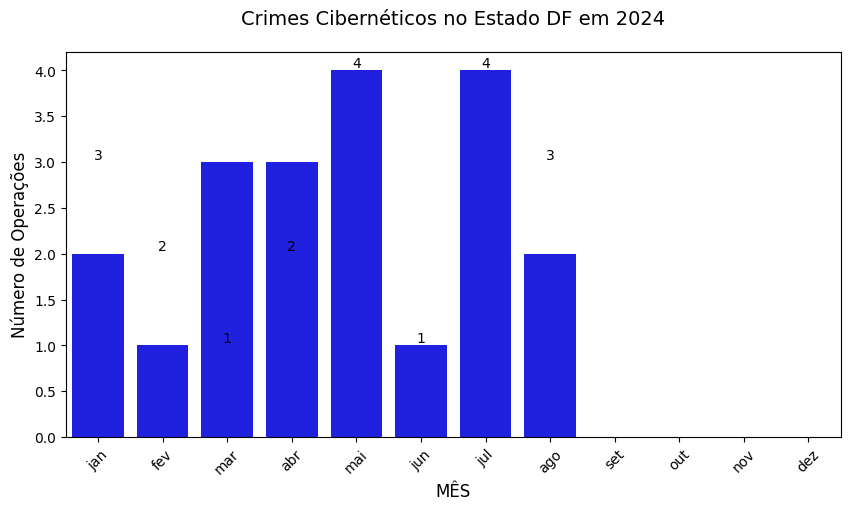

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o arquivo CSV
df.crimesciberneticos = pd.read_csv('/content/drive/MyDrive/crimes_ciberneticos.CSV', sep=';', encoding='ISO-8859-1')

# Filtrar apenas os dados do ano de 2024
df_2024 = df[df['ANO'] == 2024]

# Função para exibir os crimes com base no filtro do usuário
def filtrar_crimes():
    print("\n🔹 Escolha uma opção de filtro:")
    print("1 - Filtrar por Estado (UF)")
    print("2 - Filtrar por Mês")

    opcao = input("Digite a opção desejada (1 ou 2): ").strip()

    if opcao == '1':
        estado = input("Digite a sigla do Estado (UF) que deseja filtrar: ").strip().upper()
        df_filtrado = df_2024[df_2024['UF'] == estado]
        titulo = f"Crimes Cibernéticos no Estado {estado} em 2024"
        eixo_x = "MÊS"
    elif opcao == '2':
        mes = input("Digite o nome do mês que deseja filtrar (ex: jan, fev, mar): ").strip().lower()
        df_filtrado = df_2024[df_2024['MÊS'] == mes]
        titulo = f"Crimes Cibernéticos no mês de {mes.upper()} em 2024"
        eixo_x = "UF"
    else:
        print("❌ Opção inválida. Tente novamente.")
        return

    if df_filtrado.empty:
        print("⚠️ Nenhum dado encontrado para esse filtro.")
        return

    # Agrupar dados
    crimes_agrupados = df_filtrado.groupby(eixo_x)['QTD DE OPERAÇÕES'].sum().reset_index()

    # Ordenar meses corretamente se for o caso
    if eixo_x == "MÊS":
        meses_ordenados = ['jan', 'fev', 'mar', 'abr', 'mai', 'jun', 'jul', 'ago', 'set', 'out', 'nov', 'dez']
        crimes_agrupados['MÊS'] = pd.Categorical(crimes_agrupados['MÊS'], categories=meses_ordenados, ordered=True)
        crimes_agrupados = crimes_agrupados.sort_values(by='MÊS')

    # Exibir os dados filtrados
    display(crimes_agrupados)

    # Criar o gráfico
    plt.figure(figsize=(10, 5))
    sns.barplot(data=crimes_agrupados, x=eixo_x, y='QTD DE OPERAÇÕES', color='blue')

    # Personalizar o gráfico
    plt.title(titulo, fontsize=14, pad=20)
    plt.xlabel(eixo_x, fontsize=12)
    plt.ylabel('Número de Operações', fontsize=12)
    plt.xticks(rotation=45)

    # Adicionar valores nas barras
    for i, row in crimes_agrupados.iterrows():
        plt.text(i, row['QTD DE OPERAÇÕES'], str(row['QTD DE OPERAÇÕES']), ha='center', va='bottom', fontsize=10)

    plt.show()

# Chamar a função para interatividade
filtrar_crimes()

1 - Apresente em tela (output) toda a base de dados.

In [14]:
# Carregar o arquivo CSV
df.crimesciberneticos = pd.read_csv("/content/drive/MyDrive/crimes_ciberneticos.CSV", sep=';', encoding='ISO-8859-1')

# Exibir toda a base de dados na tela
display(df.head(10))  # Exibe as primeiras 10 linhas

<ipython-input-14-f2ad19c7479d>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.crimesciberneticos = pd.read_csv("/content/drive/MyDrive/crimes_ciberneticos.CSV", sep=';', encoding='ISO-8859-1')


,UF,ANO,MÊS,ÁREA DE ATRIBUIÇÃO,QTD DE OPERAÇÕES,FLAGRANTES,QTD DE VÍTIMAS DE ABUSO SEXUAL INFANTOJUVENIL RESGATADAS,MBAs
0,AC,2024,jan,Crimes cibernéticos relacionados ao abuso sexu...,2,0,0,2
1,AC,2024,fev,Crimes de alta tecnologia,1,0,0,1
2,AC,2024,mar,Crimes cibernéticos relacionados ao abuso sexu...,5,2,0,5
3,AC,2024,mai,Crimes cibernéticos relacionados ao abuso sexu...,1,2,0,1
4,AC,2024,jun,Crimes cibernéticos relacionados ao abuso sexu...,2,1,0,4
5,AC,2024,jul,Crimes cibernéticos relacionados ao abuso sexu...,1,0,0,2
6,AL,2024,mar,Crimes cibernéticos relacionados ao abuso sexu...,1,1,0,1
7,AL,2024,mai,Crimes cibernéticos relacionados ao abuso sexu...,3,2,0,3
8,AL,2024,jul,Crimes cibernéticos relacionados ao abuso sexu...,2,1,0,2
9,AL,2024,ago,Crimes cibernéticos relacionados ao abuso sexu...,3,0,0,2


2 - Apresente o tamanho do seu dataframe (quantas colunas x linhas).

In [17]:
# Carregar o arquivo CSV
df.crimesciberneticos = pd.read_csv("/content/drive/MyDrive/crimes_ciberneticos.CSV", sep=';', encoding='ISO-8859-1')

# Obter número de linhas e colunas
num_linhas, num_colunas = df.shape

# Exibir o resultado
display(print(f"O DataFrame tem {num_linhas} linhas e {num_colunas} colunas."))

O DataFrame tem 180 linhas e 8 colunas.


None

3 - Acesse a linha (x) e apresente em tela todas as características do item.


In [13]:
# Solicitar ao usuário o número da linha desejada
linha = int(input("Digite o número da linha que deseja visualizar: "))

# Verificar se a linha existe no DataFrame
if 0 <= linha < len(df):
    display(df.iloc[linha])  # Exibe a linha
else:
    display(print("Número de linha inválido. Tente novamente."))

Digite o número da linha que deseja visualizar: 5


,5
UF,AC
ANO,2024
MÊS,jul
ÁREA DE ATRIBUIÇÃO,Crimes cibernéticos relacionados ao abuso sexu...
QTD DE OPERAÇÕES,1
FLAGRANTES,0
QTD DE VÍTIMAS DE ABUSO SEXUAL INFANTOJUVENIL RESGATADAS,0
MBAs,2


4 - Verifique se o dataframe está vazio.

In [12]:
# Verificar se o DataFrame está vazio
if df.empty:
    display(print("O DataFrame está vazio."))
else:
    display(print("O DataFrame não está vazio."))

O DataFrame não está vazio.


None

5 - Apresente em tela os 5 primeiros registros da base de dados

In [11]:
# Exibir os 5 primeiros registros
display(df.head(5))  # Exibe os 5 primeiros registros

,UF,ANO,MÊS,ÁREA DE ATRIBUIÇÃO,QTD DE OPERAÇÕES,FLAGRANTES,QTD DE VÍTIMAS DE ABUSO SEXUAL INFANTOJUVENIL RESGATADAS,MBAs
0,AC,2024,jan,Crimes cibernéticos relacionados ao abuso sexu...,2,0,0,2
1,AC,2024,fev,Crimes de alta tecnologia,1,0,0,1
2,AC,2024,mar,Crimes cibernéticos relacionados ao abuso sexu...,5,2,0,5
3,AC,2024,mai,Crimes cibernéticos relacionados ao abuso sexu...,1,2,0,1
4,AC,2024,jun,Crimes cibernéticos relacionados ao abuso sexu...,2,1,0,4


6 - Exclua um item (linha) de sua base de dados.

In [10]:
# Solicitar ao usuário o número da linha que deseja excluir
linha = int(input("Digite o número da linha que deseja excluir: "))

# Verificar se a linha existe no DataFrame
if 0 <= linha < len(df):
    df = df.drop(index=linha).reset_index(drop=True)  # Remove a linha e reorganiza os índices
    print(f"Linha {linha} removida com sucesso!")
else:
    print("Número de linha inválido. Tente novamente.")

# Exibir o DataFrame atualizado
display(df.head(10))  # Mostra as primeiras 10 linhas após a exclusão

Digite o número da linha que deseja excluir: 3
Linha 3 removida com sucesso!


,UF,ANO,MÊS,ÁREA DE ATRIBUIÇÃO,QTD DE OPERAÇÕES,FLAGRANTES,QTD DE VÍTIMAS DE ABUSO SEXUAL INFANTOJUVENIL RESGATADAS,MBAs
0,AC,2024,jan,Crimes cibernéticos relacionados ao abuso sexu...,2,0,0,2
1,AC,2024,fev,Crimes de alta tecnologia,1,0,0,1
2,AC,2024,mar,Crimes cibernéticos relacionados ao abuso sexu...,5,2,0,5
3,AC,2024,mai,Crimes cibernéticos relacionados ao abuso sexu...,1,2,0,1
4,AC,2024,jun,Crimes cibernéticos relacionados ao abuso sexu...,2,1,0,4
5,AC,2024,jul,Crimes cibernéticos relacionados ao abuso sexu...,1,0,0,2
6,AL,2024,mar,Crimes cibernéticos relacionados ao abuso sexu...,1,1,0,1
7,AL,2024,mai,Crimes cibernéticos relacionados ao abuso sexu...,3,2,0,3
8,AL,2024,jul,Crimes cibernéticos relacionados ao abuso sexu...,2,1,0,2
9,AL,2024,ago,Crimes cibernéticos relacionados ao abuso sexu...,3,0,0,2


7 - Adicione um item (linha) na sua base de dados.

In [9]:
# Criar um dicionário com os novos dados (valores preenchidos pelo usuário)
novo_item = {}

# Preencher os valores de cada coluna
for coluna in df.columns:
    novo_item[coluna] = input(f"Digite o valor para '{coluna}': ")

# Criar um DataFrame com a nova linha
novo_df = pd.DataFrame([novo_item])

# Adicionar ao DataFrame original usando pd.concat()
df = pd.concat([df, novo_df], ignore_index=True)

# Exibir o DataFrame atualizado
display(df.head(10))  # Mostra as primeiras 10 linhas após a adição
display(df.tail(10))  # Mostra as últimas 10 linhas após a adição

Digite o valor para 'UF': df
Digite o valor para 'ANO': 2024
Digite o valor para 'MÊS': janeiro
Digite o valor para 'ÁREA DE ATRIBUIÇÃO': 1
Digite o valor para 'QTD DE OPERAÇÕES': 5
Digite o valor para 'FLAGRANTES': 6
Digite o valor para 'QTD DE VÍTIMAS DE ABUSO SEXUAL INFANTOJUVENIL RESGATADAS': 4
Digite o valor para 'MBAs': 5


,UF,ANO,MÊS,ÁREA DE ATRIBUIÇÃO,QTD DE OPERAÇÕES,FLAGRANTES,QTD DE VÍTIMAS DE ABUSO SEXUAL INFANTOJUVENIL RESGATADAS,MBAs
0,AC,2024,jan,Crimes cibernéticos relacionados ao abuso sexu...,2,0,0,2
1,AC,2024,fev,Crimes de alta tecnologia,1,0,0,1
2,AC,2024,mar,Crimes cibernéticos relacionados ao abuso sexu...,5,2,0,5
3,AC,2024,abr,Crimes cibernéticos relacionados ao abuso sexu...,2,1,0,2
4,AC,2024,mai,Crimes cibernéticos relacionados ao abuso sexu...,1,2,0,1
5,AC,2024,jun,Crimes cibernéticos relacionados ao abuso sexu...,2,1,0,4
6,AC,2024,jul,Crimes cibernéticos relacionados ao abuso sexu...,1,0,0,2
7,AL,2024,mar,Crimes cibernéticos relacionados ao abuso sexu...,1,1,0,1
8,AL,2024,mai,Crimes cibernéticos relacionados ao abuso sexu...,3,2,0,3
9,AL,2024,jul,Crimes cibernéticos relacionados ao abuso sexu...,2,1,0,2


,UF,ANO,MÊS,ÁREA DE ATRIBUIÇÃO,QTD DE OPERAÇÕES,FLAGRANTES,QTD DE VÍTIMAS DE ABUSO SEXUAL INFANTOJUVENIL RESGATADAS,MBAs
171,SP,2024,abr,Crimes cibernéticos relacionados ao abuso sexu...,16,7,0,18
172,SP,2024,mai,Crimes cibernéticos relacionados ao abuso sexu...,23,12,0,24
173,SP,2024,mai,Fraudes bancárias eletrônicas,1,0,0,7
174,SP,2024,jun,Crimes cibernéticos relacionados ao abuso sexu...,14,5,0,16
175,SP,2024,jul,Crimes cibernéticos relacionados ao abuso sexu...,18,13,0,23
176,SP,2024,jul,Crimes de alta tecnologia,1,0,0,1
177,SP,2024,ago,Crimes cibernéticos relacionados ao abuso sexu...,2,7,0,2
178,TO,2024,jun,Crimes cibernéticos relacionados ao abuso sexu...,1,0,0,2
179,TO,2024,ago,Crimes cibernéticos relacionados ao abuso sexu...,0,1,0,0
180,df,2024,janeiro,1,5,6,4,5


8 - Transponha a coluna para a linha em sua base de dados.

In [7]:
# Transpor o DataFrame (troca colunas por linhas)
df_transposto = df.T

# Exibir a base de dados transposta
print("\n Base de dados transposta:\n")
display(df_transposto)


 Base de dados transposta:



,0,1,2,3,4,5,6,7,8,9,...,170,171,172,173,174,175,176,177,178,179
UF,AC,AC,AC,AC,AC,AC,AC,AL,AL,AL,...,SP,SP,SP,SP,SP,SP,SP,SP,TO,TO
ANO,2024,2024,2024,2024,2024,2024,2024,2024,2024,2024,...,2024,2024,2024,2024,2024,2024,2024,2024,2024,2024
MÊS,jan,fev,mar,abr,mai,jun,jul,mar,mai,jul,...,mar,abr,mai,mai,jun,jul,jul,ago,jun,ago
ÁREA DE ATRIBUIÇÃO,Crimes cibernéticos relacionados ao abuso sexu...,Crimes de alta tecnologia,Crimes cibernéticos relacionados ao abuso sexu...,Crimes cibernéticos relacionados ao abuso sexu...,Crimes cibernéticos relacionados ao abuso sexu...,Crimes cibernéticos relacionados ao abuso sexu...,Crimes cibernéticos relacionados ao abuso sexu...,Crimes cibernéticos relacionados ao abuso sexu...,Crimes cibernéticos relacionados ao abuso sexu...,Crimes cibernéticos relacionados ao abuso sexu...,...,Crimes cibernéticos relacionados ao abuso sexu...,Crimes cibernéticos relacionados ao abuso sexu...,Crimes cibernéticos relacionados ao abuso sexu...,Fraudes bancárias eletrônicas,Crimes cibernéticos relacionados ao abuso sexu...,Crimes cibernéticos relacionados ao abuso sexu...,Crimes de alta tecnologia,Crimes cibernéticos relacionados ao abuso sexu...,Crimes cibernéticos relacionados ao abuso sexu...,Crimes cibernéticos relacionados ao abuso sexu...
QTD DE OPERAÇÕES,2,1,5,2,1,2,1,1,3,2,...,21,16,23,1,14,18,1,2,1,0
FLAGRANTES,0,0,2,1,2,1,0,1,2,1,...,5,7,12,0,5,13,0,7,0,1
QTD DE VÍTIMAS DE ABUSO SEXUAL INFANTOJUVENIL RESGATADAS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBAs,2,1,5,2,1,4,2,1,3,2,...,22,18,24,7,16,23,1,2,2,0


9 - Apresente em tela somente a 1ª e a 2ª coluna (rótulo) da base de dados.

In [8]:
# Selecionar somente as duas primeiras colunas
df_duas_colunas = df.iloc[:, :2]  # Seleciona todas as linhas, mas apenas as 2 primeiras colunas

# Exibir os dados
print("\n Exibindo somente a 1ª e 2ª coluna:\n")
display(df_duas_colunas)


 Exibindo somente a 1ª e 2ª coluna:



,UF,ANO
0,AC,2024
1,AC,2024
2,AC,2024
3,AC,2024
4,AC,2024
...,...,...
175,SP,2024
176,SP,2024
177,SP,2024
178,TO,2024


10 - Informe como foi desenvolvido o Projeto e comente um gráfico gerado por você sobre a análise de dados.

Nome: Diego Oliveira Coimbra Batista Santos

Curso/Campus: Brasília

E-mail: diego62713@estudante.ifb.edu.br

Título do projeto: Crimes Cibernéticos

Instituição: IFB

Professora: Kadidja Valéria

Data de início: 23/1/2025

Data de conclusão: 10/2/2025  

Site pesquisado:
Polícia Federal, Diretoria de Combate a Crimes Cibernéticos. Disponível em: https://www.gov.br/pf/pt-br/acesso-a-informacao/estatisticas/diretoria-de-combate-a-crimes-ciberneticos-dciber. Acesso em: 30 jan. 2025.

Desenvolvimento do Projeto
O projeto foi desenvolvido utilizando a linguagem Python no ambiente Google Colab, que permite fácil manipulação e visualização de dados. A base de dados utilizada contém informações sobre crimes cibernéticos no Brasil e foi carregada a partir de um arquivo CSV.

As bibliotecas pandas, matplotlib e seaborn foram essenciais para a análise e visualização dos dados. Através do pandas, realizei o carregamento, limpeza e manipulação do DataFrame, enquanto matplotlib e seaborn foram utilizadas para gerar gráficos que facilitaram a interpretação dos dados.

Durante o desenvolvimento, foram aplicadas diversas técnicas, como:
Filtragem de dados (exemplo: visualizar crimes apenas do Distrito Federal).Ordenação dos estados por quantidade de ocorrências.
Geração de gráficos para análise visual.
Interação com o usuário, permitindo consultas dinâmicas por estado e período.


